In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data_mp3_2.csv', sep=';', encoding='utf-8-sig')

print("Veri Başarıyla Yüklendi ve Sütunlar Düzenlendi!")
df.head()

Veri Başarıyla Yüklendi ve Sütunlar Düzenlendi!


,Meslek Ünvanı,Sektör,Otomasyon Potansiyeli Yüzdesi,Yapay Zekaya Maruz Kalma Skorı (1-100),Gelecek Talep Değişimi Tahmini (yüzdelik değişim),Kaynak_Otomasyon,Kaynak_Yapay Zekaya Maruz Kalma,Kaynak_Talep_Değişimi
0,Veri Bilimcisi,Teknoloji/Analitik,20,60,30,TİSK - 'Geleceğin İşleri Raporu',Stanford HAI - 'AI Index Report',WEF - 'Future of Jobs Report'
1,Veri Analisti,Teknoloji/Analitik,40,85,22,PwC - 'Global AI Study',OpenAI - 'GPTs are GPTs',WEF - 'Future of Jobs Report'
2,AI Etiği Uzmanı,Teknoloji/Hukuk,10,30,45,McKinsey - 'Generative AI and the future of work',Stanford HAI - 'AI Index Report',WEF - 'Future of Jobs Report'
3,AI Güvenlik Uzmanı,Teknoloji/Güvenlik,5,25,48,McKinsey - 'Generative AI and the future of work',Stanford HAI - 'AI Index Report',WEF - 'Future of Jobs Report'
4,Grafik Tasarımcı,Tasarım,60,75,2,McKinsey - 'Generative AI and the future of work',OpenAI - 'GPTs are GPTs',WEF - 'Future of Jobs Report'


In [5]:
# Temel İstatistikler
print("--- İstatistiksel Özet ---")
print(df.describe())

# Eksik Veri Kontrolü
print("\n--- Eksik Veri Sayısı ---")
print(df.isnull().sum())

--- İstatistiksel Özet ---
       Otomasyon Potansiyeli Yüzdesi  Yapay Zekaya Maruz Kalma Skorı (1-100)  \
count                      40.000000                               40.000000   
mean                       46.950000                               58.275000   
std                        31.050786                               26.710209   
min                         5.000000                                5.000000   
25%                        20.000000                               40.000000   
50%                        40.000000                               62.500000   
75%                        75.250000                               80.500000   
max                       100.000000                               98.000000   

       Gelecek Talep Değişimi Tahmini (yüzdelik değişim)  
count                                           40.00000  
mean                                             2.97500  
std                                             21.57692  
min             

--- Korelasyon Değerleri ---
                                                   Otomasyon Potansiyeli Yüzdesi  \
Otomasyon Potansiyeli Yüzdesi                                           1.000000   
Yapay Zekaya Maruz Kalma Skorı (1-100)                                  0.439830   
Gelecek Talep Değişimi Tahmini (yüzdelik değişim)                      -0.854983   

                                                   Yapay Zekaya Maruz Kalma Skorı (1-100)  \
Otomasyon Potansiyeli Yüzdesi                                                    0.439830   
Yapay Zekaya Maruz Kalma Skorı (1-100)                                           1.000000   
Gelecek Talep Değişimi Tahmini (yüzdelik değişim)                               -0.181688   

                                                   Gelecek Talep Değişimi Tahmini (yüzdelik değişim)  
Otomasyon Potansiyeli Yüzdesi                                                              -0.854983  
Yapay Zekaya Maruz Kalma Skorı (1-100)                 

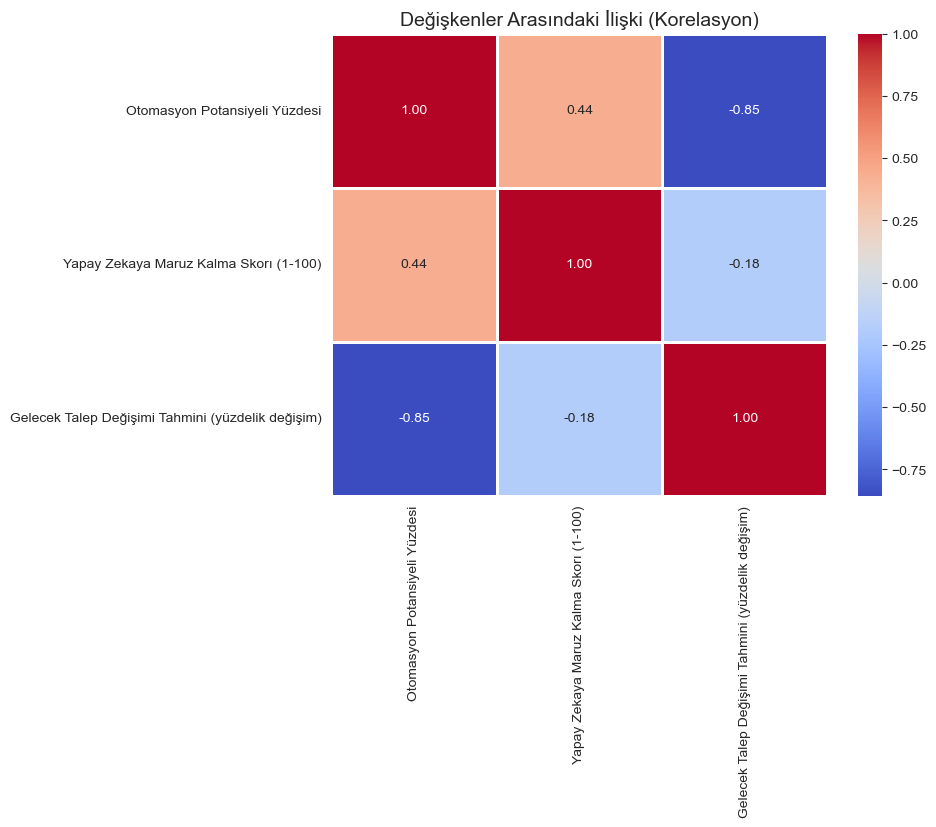

In [6]:
corr_matrix = df.select_dtypes(include=['number']).corr()

print("--- Korelasyon Değerleri ---")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Değişkenler Arasındaki İlişki (Korelasyon)', fontsize=14)
plt.show()

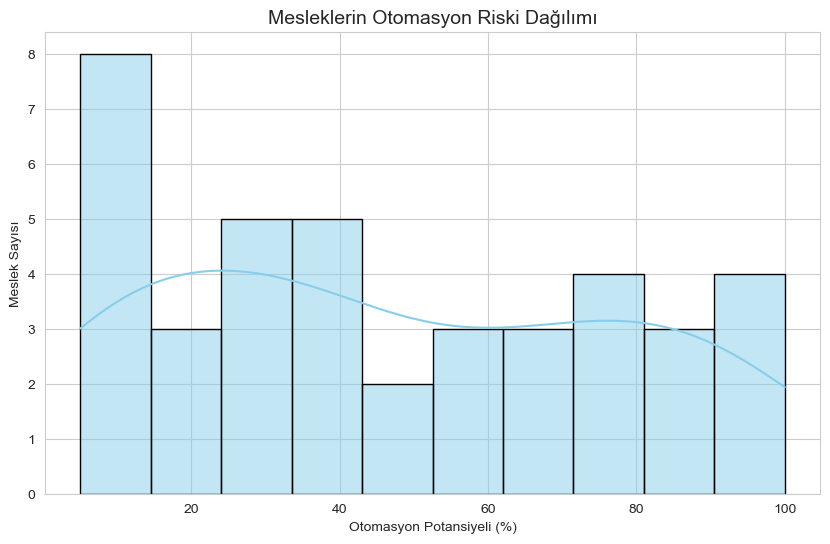

In [9]:
plt.figure(figsize=(10, 6))

# Histogram çizimi
sns.histplot(df['Otomasyon Potansiyeli Yüzdesi'], bins=10, kde=True, color='skyblue', edgecolor='black')

plt.title('Mesleklerin Otomasyon Riski Dağılımı', fontsize=14)
plt.xlabel('Otomasyon Potansiyeli (%)')
plt.ylabel('Meslek Sayısı')
plt.show()

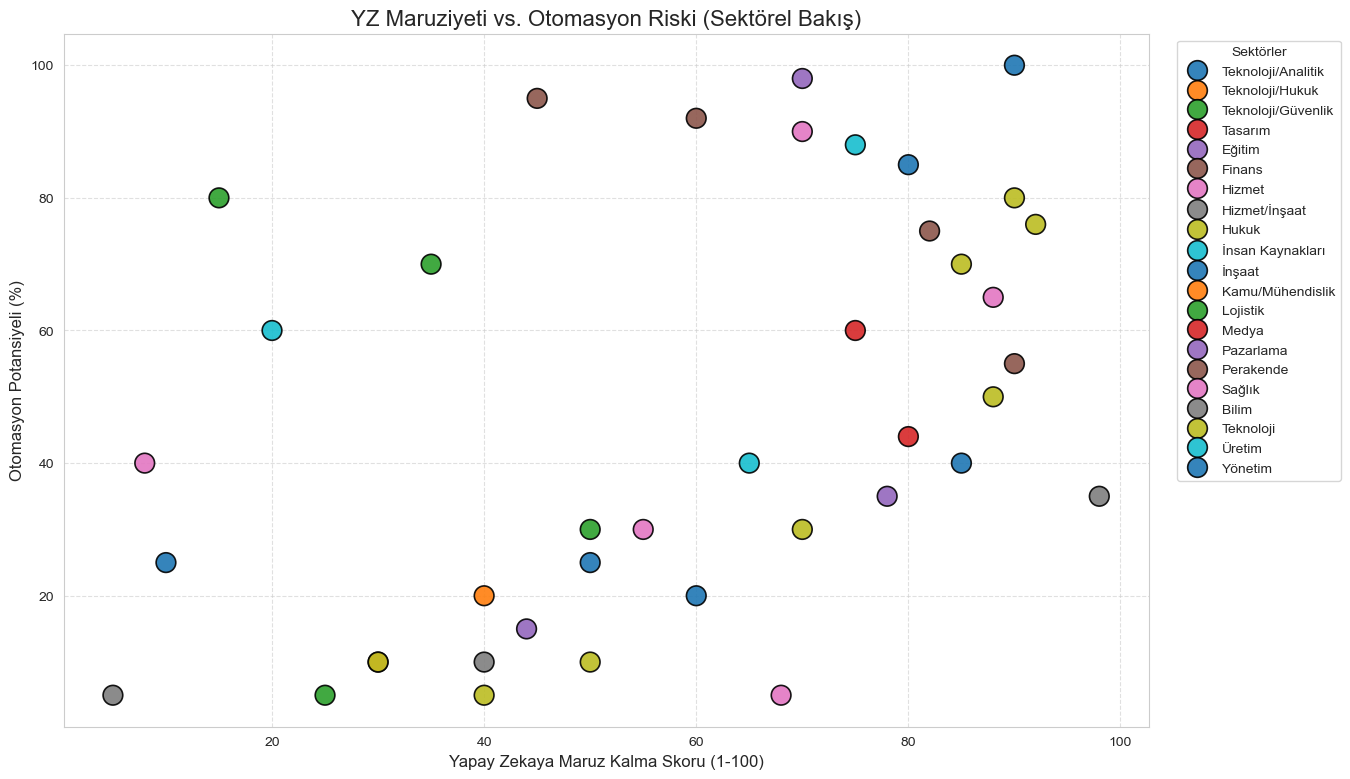

In [10]:
plt.figure(figsize=(14, 9))

sns.scatterplot(data=df, 
                x='Yapay Zekaya Maruz Kalma Skorı (1-100)', 
                y='Otomasyon Potansiyeli Yüzdesi', 
                hue='Sektör', 
                palette='tab10',   
                s=200,             
                alpha=0.9, 
                edgecolor='black',
                linewidth=1.2)

plt.title('YZ Maruziyeti vs. Otomasyon Riski (Sektörel Bakış)', fontsize=16)
plt.xlabel('Yapay Zekaya Maruz Kalma Skoru (1-100)', fontsize=12)
plt.ylabel('Otomasyon Potansiyeli (%)', fontsize=12)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Sektörler')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

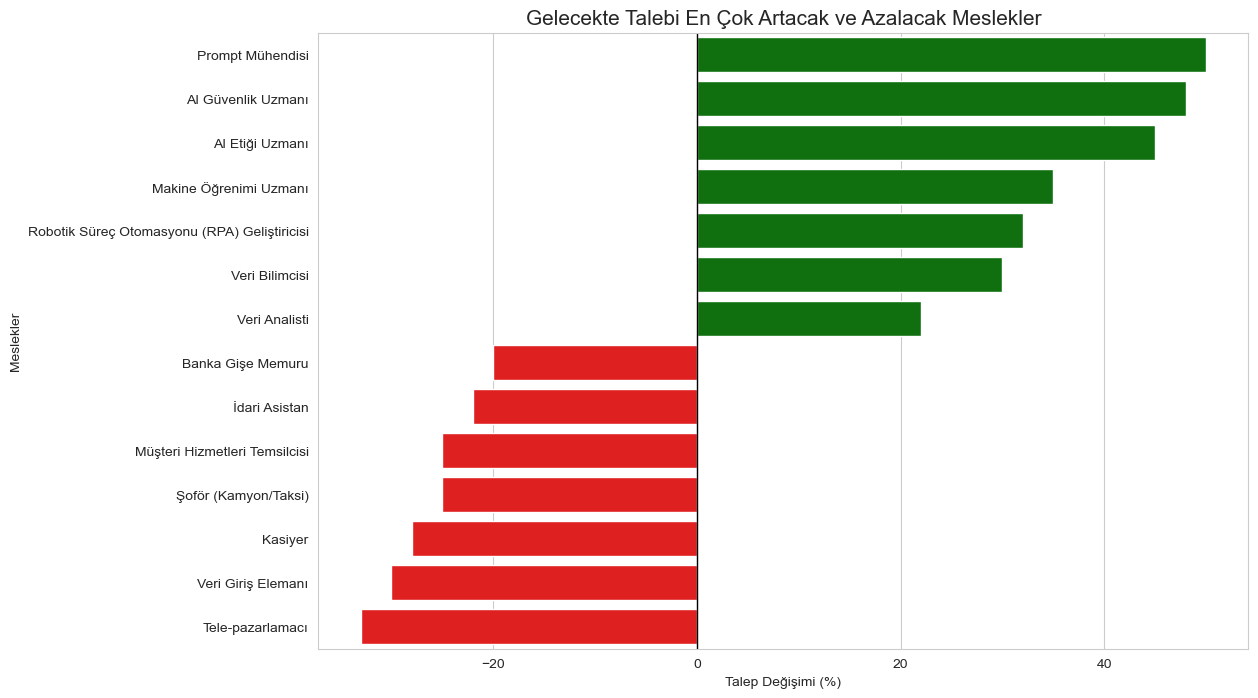

In [16]:
plt.figure(figsize=(12, 8))

talep_sutunu = 'Gelecek Talep Değişimi Tahmini (yüzdelik değişim)'
meslek_sutunu = 'Meslek Ünvanı'

df_sirali = df.sort_values(talep_sutunu, ascending=False)

top_bottom = pd.concat([df_sirali.head(7), df_sirali.tail(7)])

colors = {meslek: 'green' if talep > 0 else 'red' 
          for meslek, talep in zip(top_bottom[meslek_sutunu], top_bottom[talep_sutunu])}

sns.barplot(data=top_bottom, 
            x=talep_sutunu, 
            y=meslek_sutunu, 
            hue=meslek_sutunu, 
            palette=colors,    
            legend=False)     

plt.title('Gelecekte Talebi En Çok Artacak ve Azalacak Meslekler', fontsize=15)
plt.xlabel('Talep Değişimi (%)')
plt.ylabel('Meslekler')
plt.axvline(0, color='black', linewidth=1) 
plt.show()

### MP4 Analiz Sonuçları ve Yorumlar

Yapılan veri analizi sonucunda elde edilen kritik bulgular şunlardır:

1.  **Otomasyon ve Talep İlişkisi:** Verilerimiz, **otomasyon potansiyeli** ile **talep değişimi** arasında çok güçlü bir **negatif korelasyon (-0.85)** olduğunu göstermektedir. Yani bir mesleğin makineleşme ihtimali arttıkça, o mesleğe duyulan ihtiyaç kesin olarak azalmaktadır.
2.  **YZ Maruziyeti Etkisi:** Analizimiz, yapay zekaya maruz kalma skoru yüksek olan mesleklerin otomasyon riskinin de arttığını **(+0.44 Korelasyon)** ortaya koymuştur. Bu durum, YZ'nin şu aşamada iş süreçlerini desteklemekten ziyade otomatize etme eğiliminde olduğunu düşündürmektedir.
3.  **Sektörel Ayrışma:** Scatter plot grafiğinde görüldüğü üzere, **Teknoloji** sektörü yüksek maruziyete sahip olsa da diğer sektörlere kıyasla daha dirençli bir yapı sergilemektedir. Buna karşın rutin görevlerin yoğun olduğu hizmet ve idari sektörlerde risk belirgin şekilde yüksektir.